# 1. Understanding Data

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('data/Train.csv')
df_Test = pd.read_csv('data/Train.csv')

In [5]:
df.head()

Place_ID X Date        Date Place_ID  target  target_min  target_max   
0  010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0        53.0  \
1  010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0        63.0   
2  010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0        56.0   
3  010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0        55.0   
4  010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0        52.0   

   target_variance  target_count  precipitable_water_entire_atmosphere   
0           769.50            92                             11.000000  \
1          1319.85            91                             14.600000   
2          1181.96            96                             16.400000   
3          1113.67            96                              6.911948   
4          1164.82            95                             13.900001   

   relative_humidity_2m_above_ground  ...  L3_SO2_sensor_zenith_angle   
0                          60.200001  ...                   38.593017  \
1                          48.799999  ...                   59.624912   
2                          33.400002  ...                   49.839714   
3                          21.300001  ...                   29.181258   
4                          44.700001  ...                    0.797294   

   L3_SO2_solar_azimuth_angle  L3_SO2_solar_zenith_angle   
0                  -61.752587                  22.363665  \
1                  -67.693509                  28.614804   
2                  -78.342701                  34.296977   
3                  -73.896588                  30.545446   
4                  -68.612480                  26.899694   

   L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height   
0                                    1793.793579            3227.855469  \
1                                    1789.960449            3384.226562   
2                                            NaN                    NaN   
3                                            NaN                    NaN   
4                                            NaN                    NaN   

   L3_CH4_aerosol_optical_depth  L3_CH4_sensor_azimuth_angle   
0                      0.010579                    74.481049  \
1                      0.015104                    75.630043   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

   L3_CH4_sensor_zenith_angle  L3_CH4_solar_azimuth_angle   
0                   37.501499                  -62.142639  \
1                   55.657486                  -53.868134   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   L3_CH4_solar_zenith_angle  
0                  22.545118  
1                  19.293652  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 82 columns]

In [6]:
df.shape

(30557, 82)

In [7]:
df.nunique()

Place_ID X Date                 30557
Date                               94
Place_ID                          340
target                            375
target_min                        269
                                ...  
L3_CH4_aerosol_optical_depth     2874
L3_CH4_sensor_azimuth_angle      2874
L3_CH4_sensor_zenith_angle       2874
L3_CH4_solar_azimuth_angle       2874
L3_CH4_solar_zenith_angle        2874
Length: 82, dtype: int64

In [8]:
df.columns.unique()


Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [9]:
list(df.columns)

['Place_ID X Date',
 'Date',
 'Place_ID',
 'target',
 'target_min',
 'target_max',
 'target_variance',
 'target_count',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO

In [10]:
df.columns[df.columns.duplicated()]


Index([], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

<Axes: >

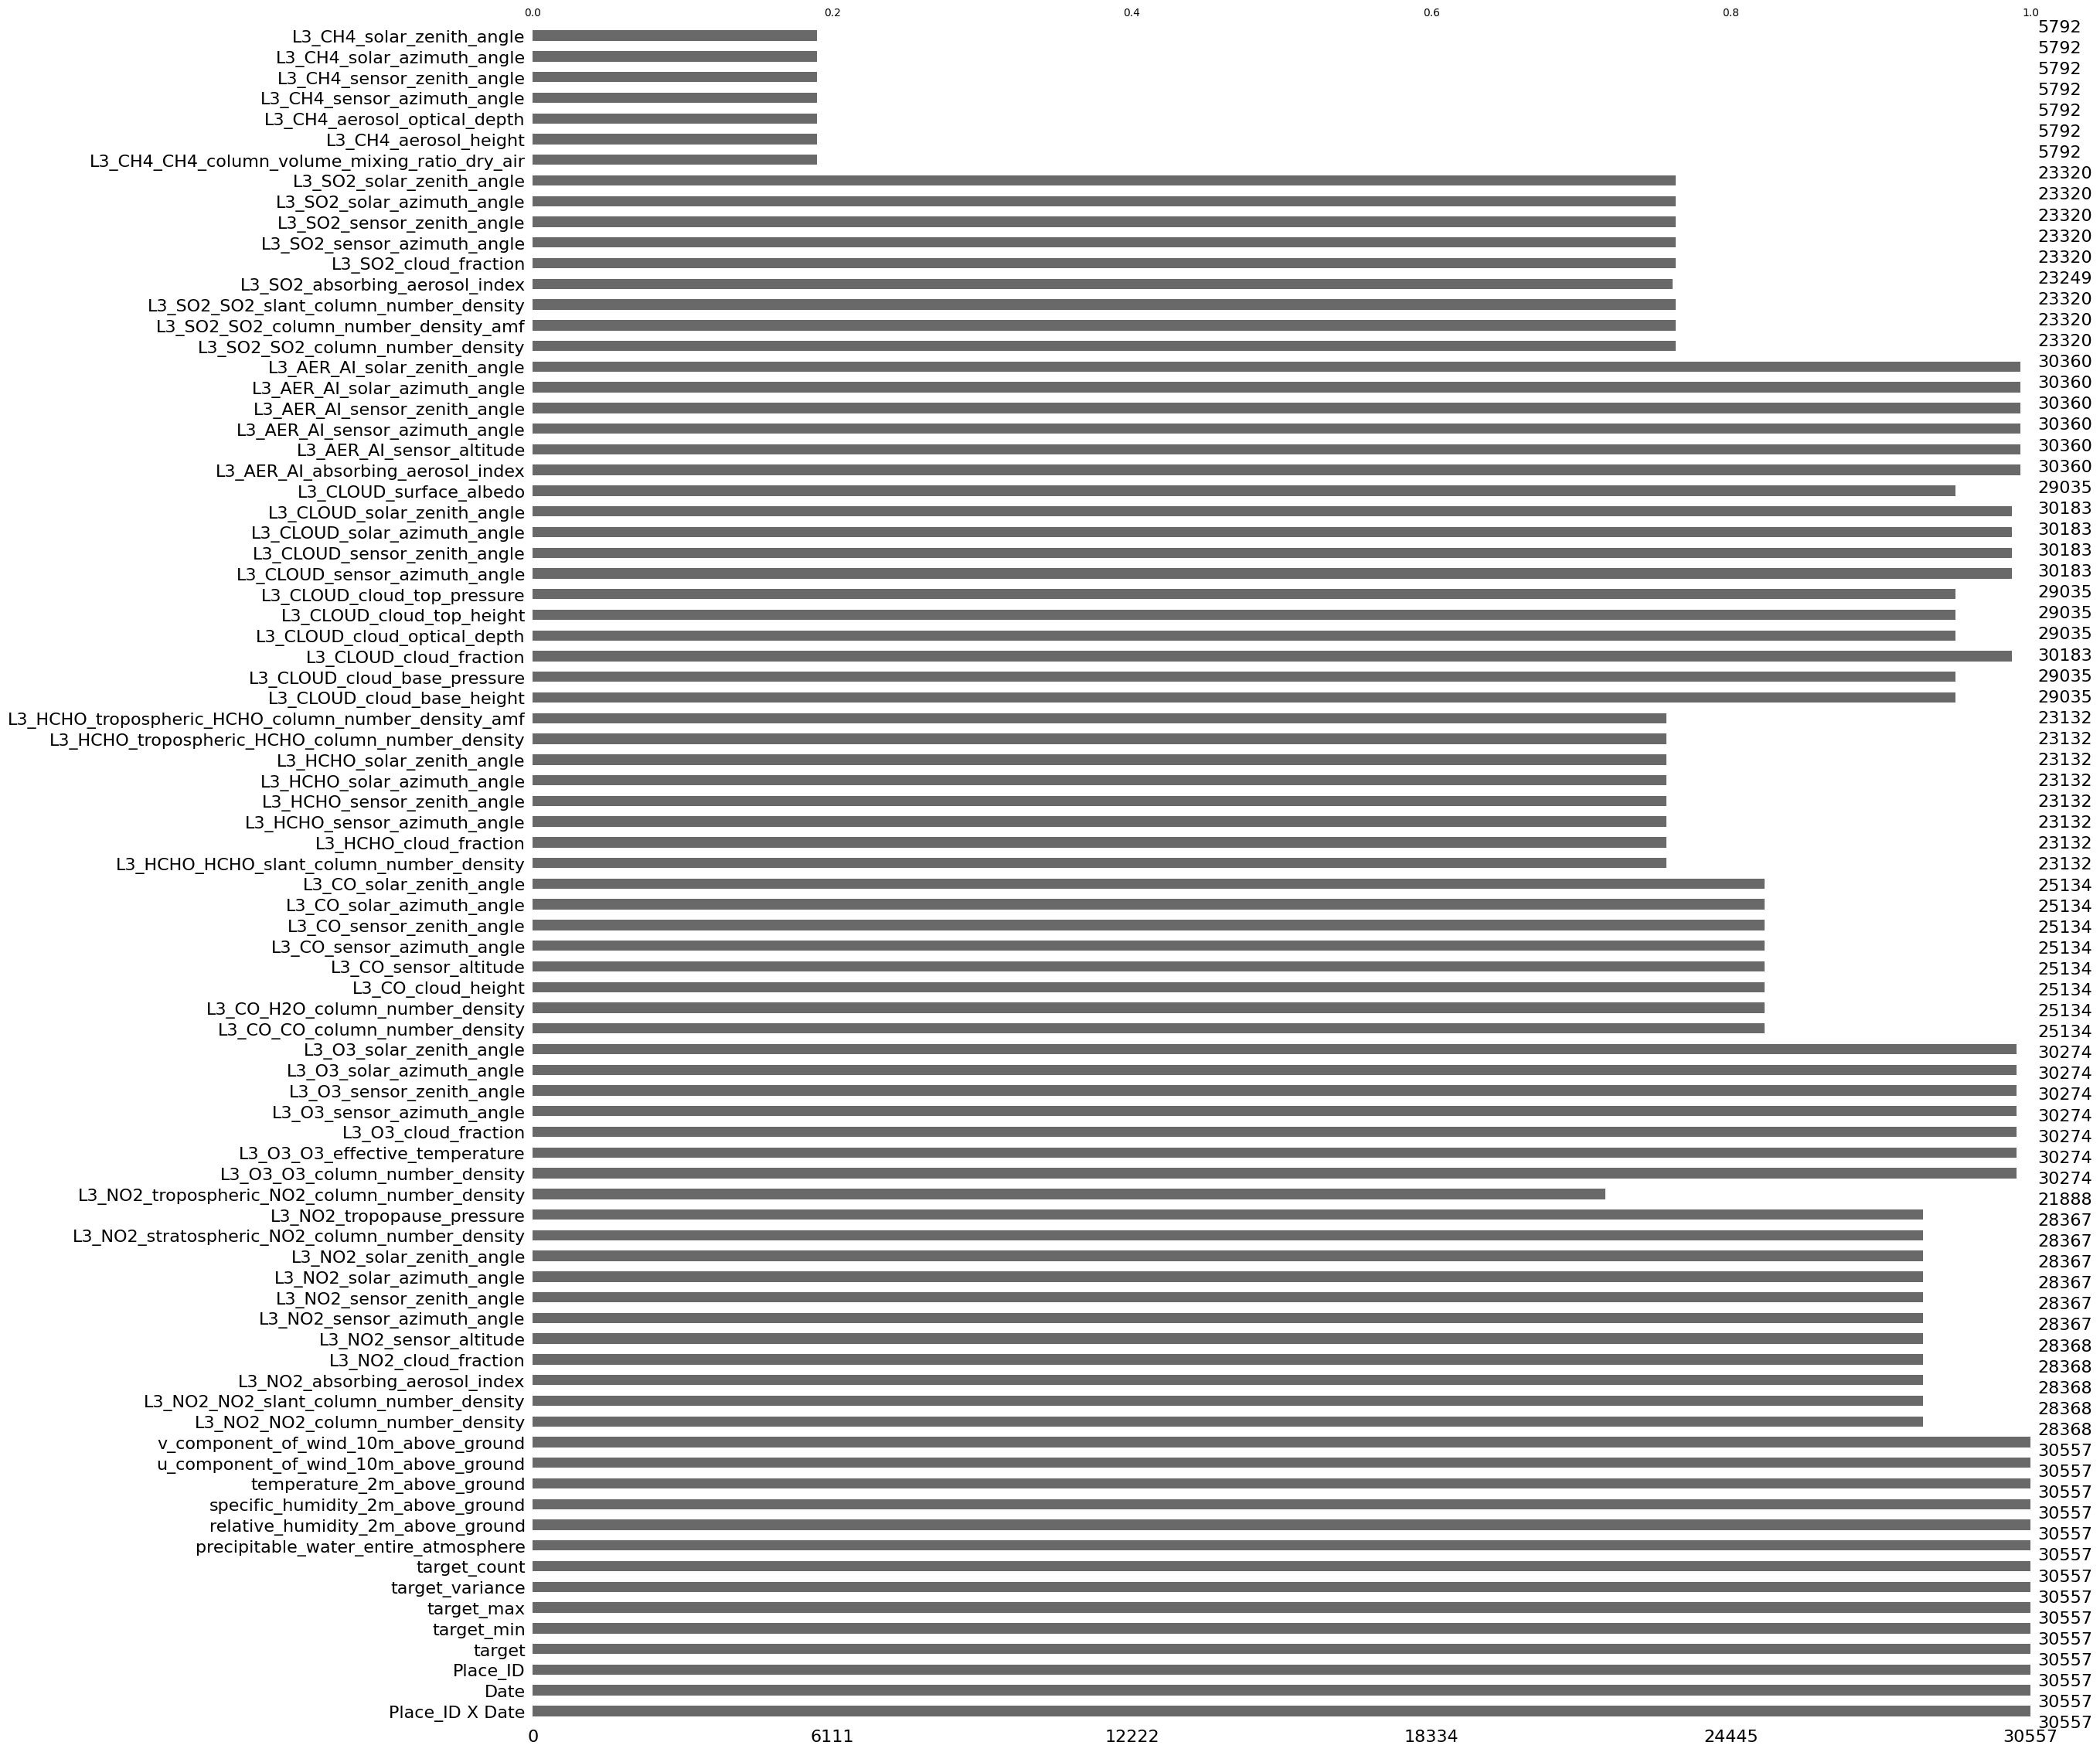

In [12]:
msno.bar(df)

In [13]:
df.describe()



target    target_min    target_max  target_variance   
count  30557.000000  30557.000000  30557.000000     3.055700e+04  \
mean      61.148045     29.025866    117.992234     7.983756e+03   
std       46.861309     33.119775    100.417713     4.863090e+04   
min        1.000000      1.000000      1.000000     0.000000e+00   
25%       25.000000      5.000000     60.000000     1.064920e+03   
50%       50.000000     15.000000     91.000000     2.395350e+03   
75%       80.000000     44.000000    155.000000     5.882550e+03   
max      815.000000    438.000000    999.000000     1.841490e+06   

       target_count  precipitable_water_entire_atmosphere   
count  30557.000000                          30557.000000  \
mean     125.831135                             15.302326   
std      146.581856                             10.688573   
min        2.000000                              0.420044   
25%       44.000000                              7.666667   
50%       72.000000                             12.200000   
75%      150.000000                             19.900000   
max     1552.000000                             72.599998   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
count                       30557.000000                       30557.000000  \
mean                           70.552747                           0.006004   
std                            18.807884                           0.003787   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  ...   
count                 30557.000000                          30557.000000  ...  \
mean                      9.321342                              0.416886  ...   
std                       9.343226                              2.707990  ...   
min                     -34.647879                            -15.559646  ...   
25%                       3.123071                             -1.097864  ...   
50%                       8.478424                              0.222092  ...   
75%                      16.201563                              1.772925  ...   
max                      37.437921                             17.955124  ...   

       L3_SO2_sensor_zenith_angle  L3_SO2_solar_azimuth_angle   
count                23320.000000                23320.000000  \
mean                    35.590916                 -123.697777   
std                     18.955228                   71.916036   
min                      0.000000                 -179.880630   
25%                     19.451524                 -165.882624   
50%                     37.918838                 -156.637162   
75%                     52.270055                 -118.453598   
max                     66.111289                  179.776125   

       L3_SO2_solar_zenith_angle   
count               23320.000000  \
mean                   46.533951   
std                    14.594267   
min                     0.000000   
25%                    36.693094   
50%                    47.445010   
75%                    57.438181   
max                    79.631711   

       L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height   
count                                    5792.000000            5792.000000  \
mean                                      923.231949            1711.793613   
std                                       929.633988            1741.299304   
min                                         0.000000               0.000000   
25%                                         0.000000               0.000000   
50%                    

In [14]:
df_filtered = df.loc[:, ~((df.columns.str.startswith('L3')) & (~df.columns.str.contains('column_number_density')))]

In [15]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 27 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [16]:
type(df['Date'])
#->Change to np datetime

pandas.core.series.Series

In [17]:
def filter_cols(df):

    keep_cols = ['L3_CLOUD_cloud_fraction', 
                 'L3_CLOUD_cloud_base_height', 
                 'L3_CLOUD_cloud_optical_depth', 
                 'L3_AER_AI_absorbing_aerosol_index']

    mask = (
        (df.columns.str.startswith('L3')) & 
        (~df.columns.str.contains('column_number_density')) |
        df.columns.str.contains('slant|stratospheric|amf'))

    return df.loc[:, ~mask | df.columns.isin(keep_cols)]


In [18]:
df_filtered = filter_cols(df)

In [19]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Place_ID X Date                                  30557 non-null  object 
 1   Date                                             30557 non-null  object 
 2   Place_ID                                         30557 non-null  object 
 3   target                                           30557 non-null  float64
 4   target_min                                       30557 non-null  float64
 5   target_max                                       30557 non-null  float64
 6   target_variance                                  30557 non-null  float64
 7   target_count                                     30557 non-null  int64  
 8   precipitable_water_entire_atmosphere             30557 non-null  float64
 9   relative_humidity_2m_above_g

In [20]:
sns.pairplot(df_filtered,hue='target')

KeyboardInterrupt: 

: 

: 

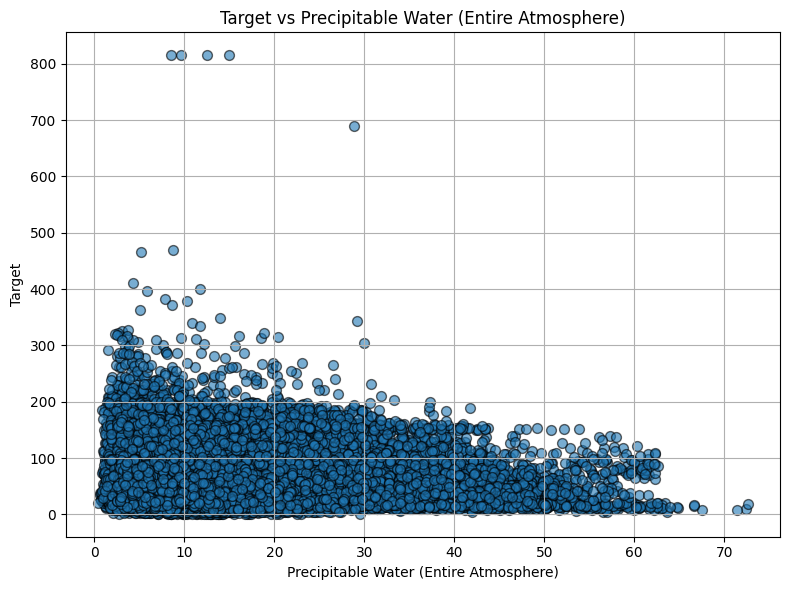

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["precipitable_water_entire_atmosphere"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("Precipitable Water (Entire Atmosphere)")
plt.ylabel("Target")
plt.title("Target vs Precipitable Water (Entire Atmosphere)")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

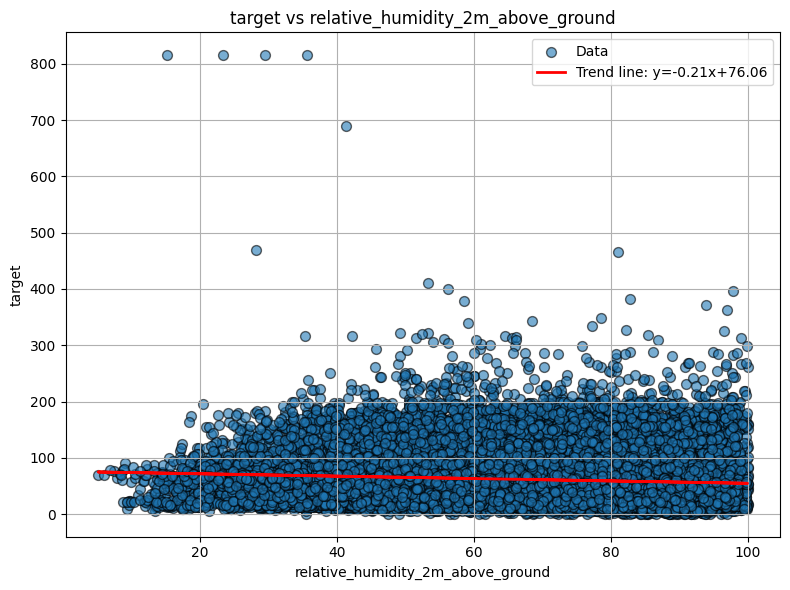

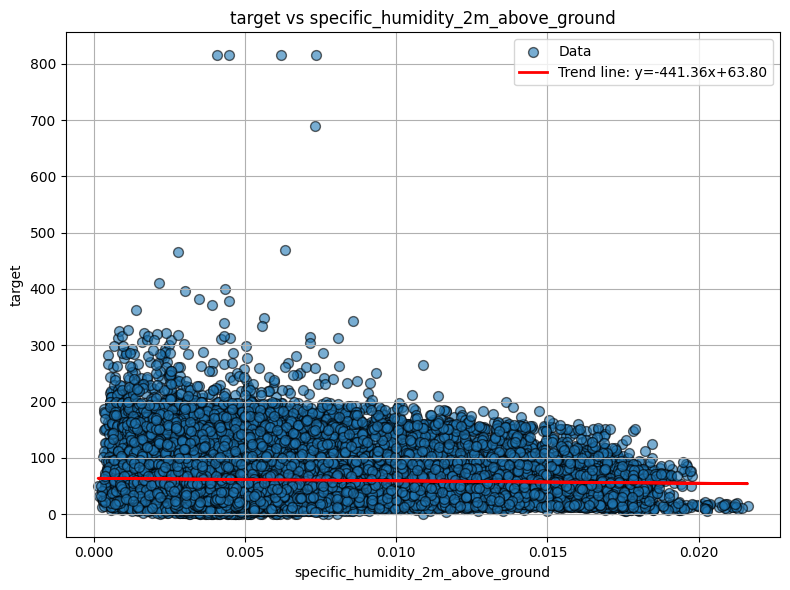

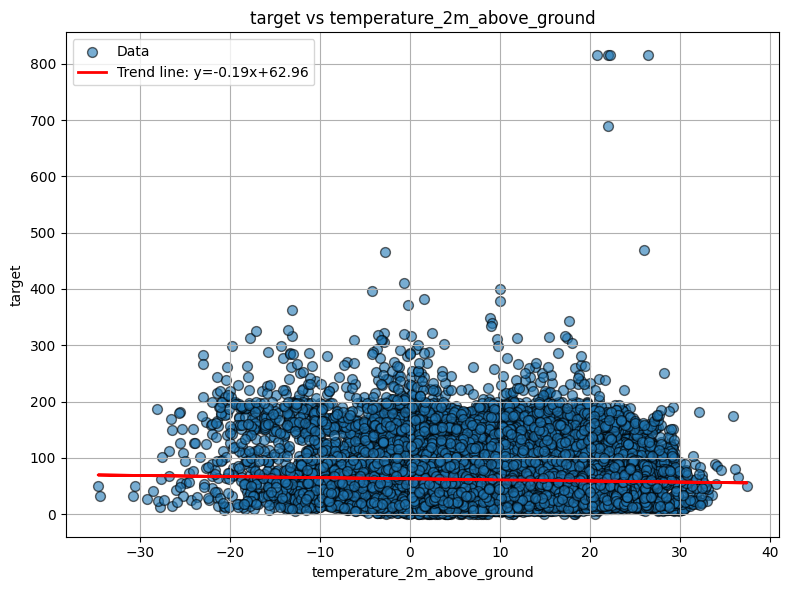

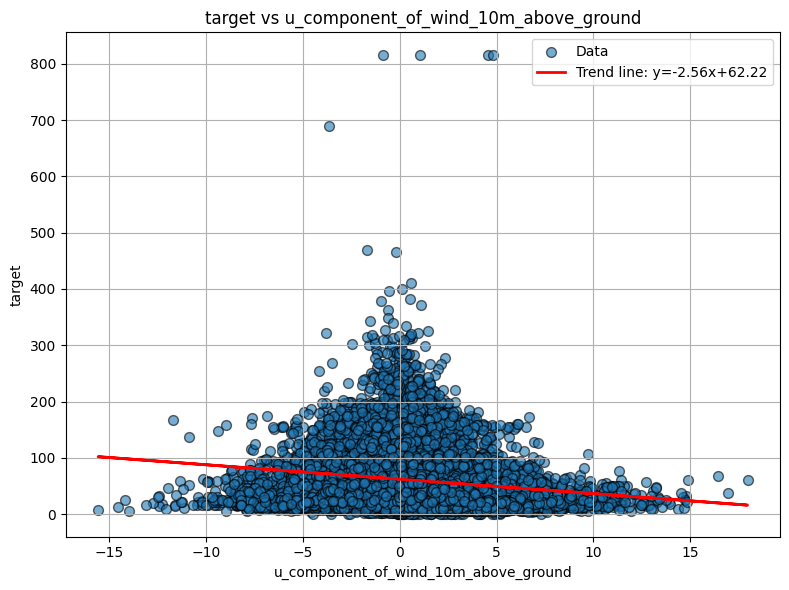

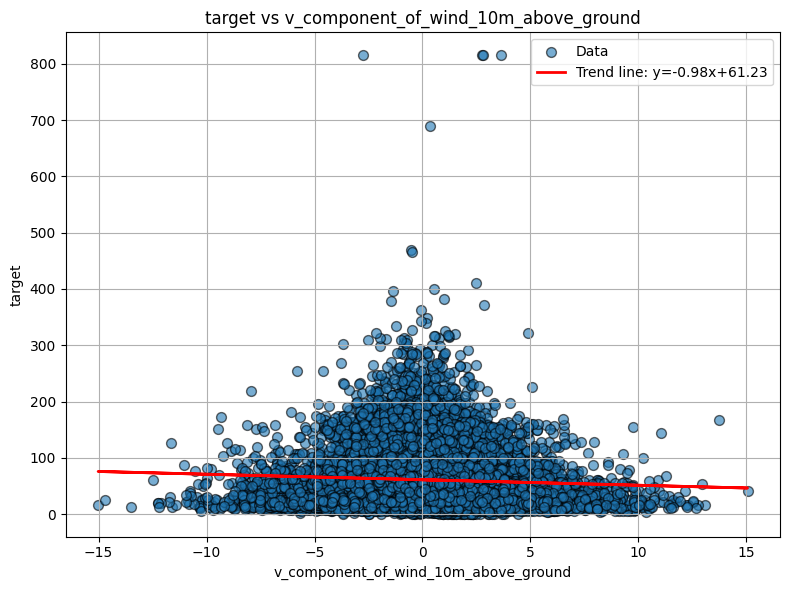

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

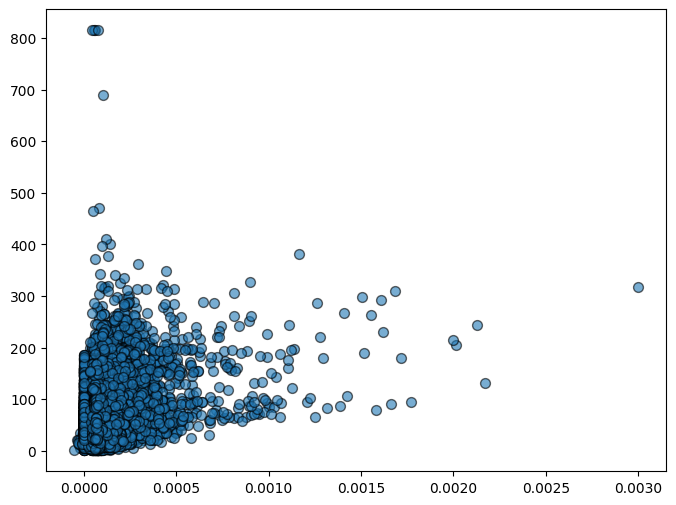

In [ ]:

def scatter_plots_with_trend(df, target_col, start_idx, end_idx):
    """
    Creates scatter plots of target_col vs columns from start_idx to end_idx,
    with a linear regression trend line.
    
    Parameters:
        df (pd.DataFrame): Your DataFrame
        target_col (str): Name of the target column
        start_idx (int): Starting column index (inclusive)
        end_idx (int): Ending column index (inclusive)
    """
    for col in df.columns[start_idx:end_idx + 1]:
        x = df[col]
        y = df[target_col]
        
        plt.figure(figsize=(8,6))
        plt.scatter(x, y, alpha=0.6, edgecolor='k', s=50, label='Data')
        
        # Fit linear regression line
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red', linewidth=2, label=f'Trend line: y={m:.2f}x+{b:.2f}')
        
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.title(f"{target_col} vs {col}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Example usage:
scatter_plots_with_trend(df_filtered, target_col="target", start_idx=9, end_idx=25)

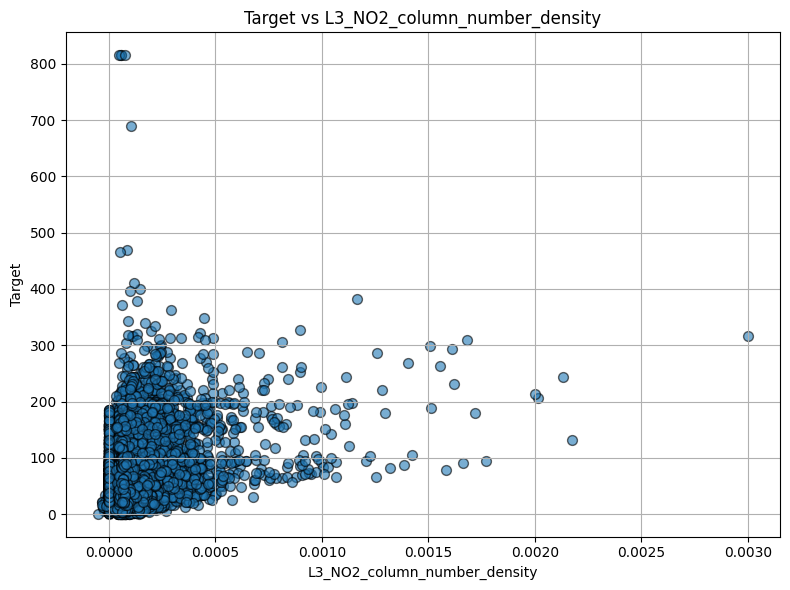

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["L3_NO2_NO2_column_number_density"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("L3_NO2_column_number_density")
plt.ylabel("Target")
plt.title("Target vs L3_NO2_column_number_density")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

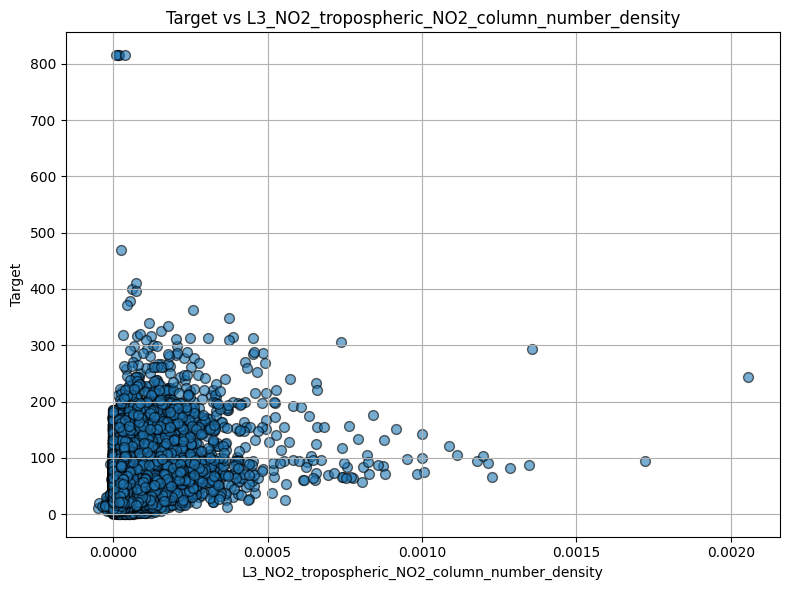

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["L3_NO2_tropospheric_NO2_column_number_density"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("L3_NO2_tropospheric_NO2_column_number_density")
plt.ylabel("Target")
plt.title("Target vs L3_NO2_tropospheric_NO2_column_number_density")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

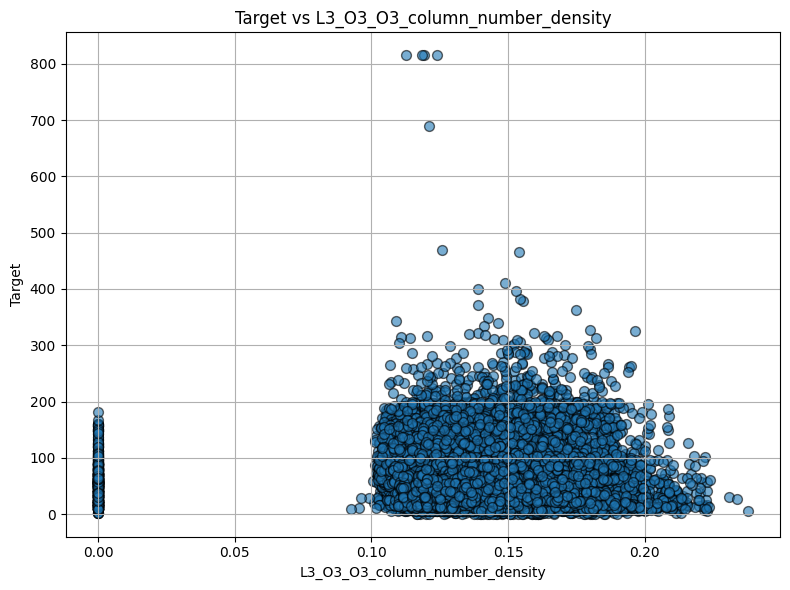

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["L3_O3_O3_column_number_density"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("L3_O3_O3_column_number_density")
plt.ylabel("Target")
plt.title("Target vs L3_O3_O3_column_number_density")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

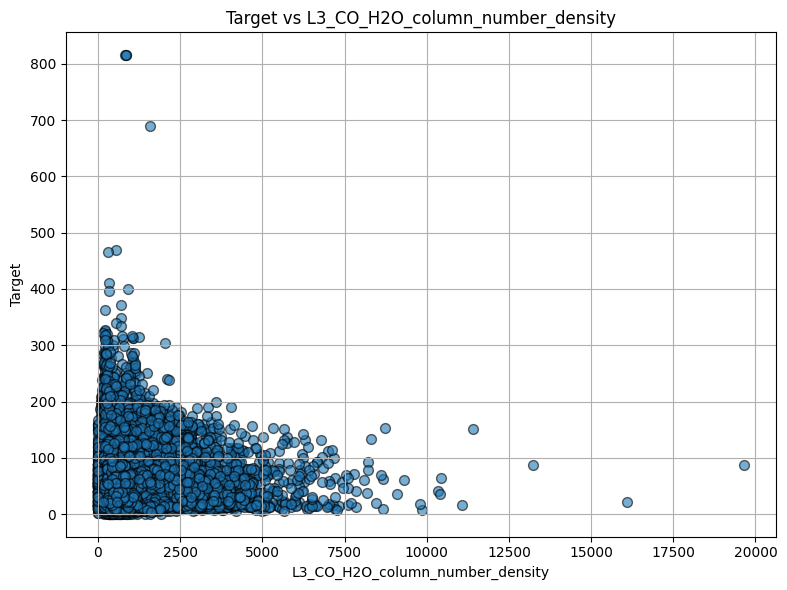

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["L3_CO_H2O_column_number_density"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("L3_CO_H2O_column_number_density")
plt.ylabel("Target")
plt.title("Target vs L3_CO_H2O_column_number_density")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

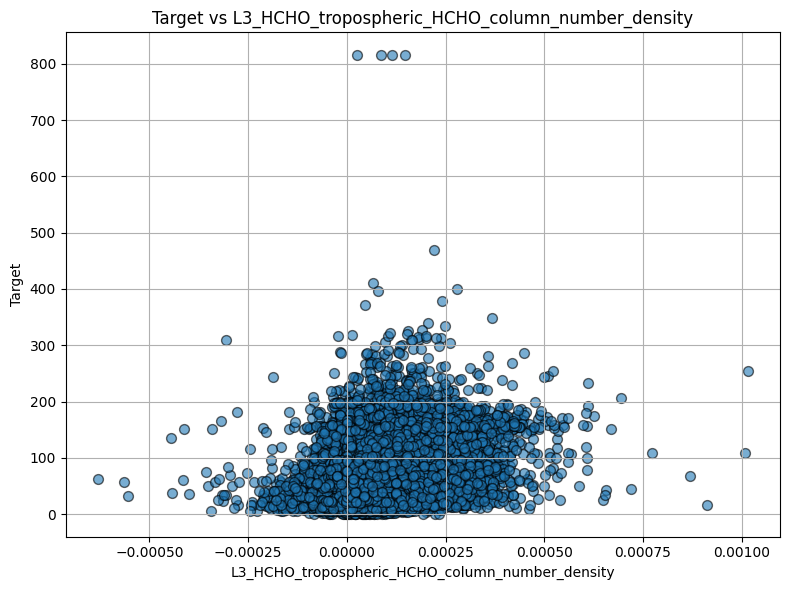

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["L3_HCHO_tropospheric_HCHO_column_number_density"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("L3_HCHO_tropospheric_HCHO_column_number_density")
plt.ylabel("Target")
plt.title("Target vs L3_HCHO_tropospheric_HCHO_column_number_density")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

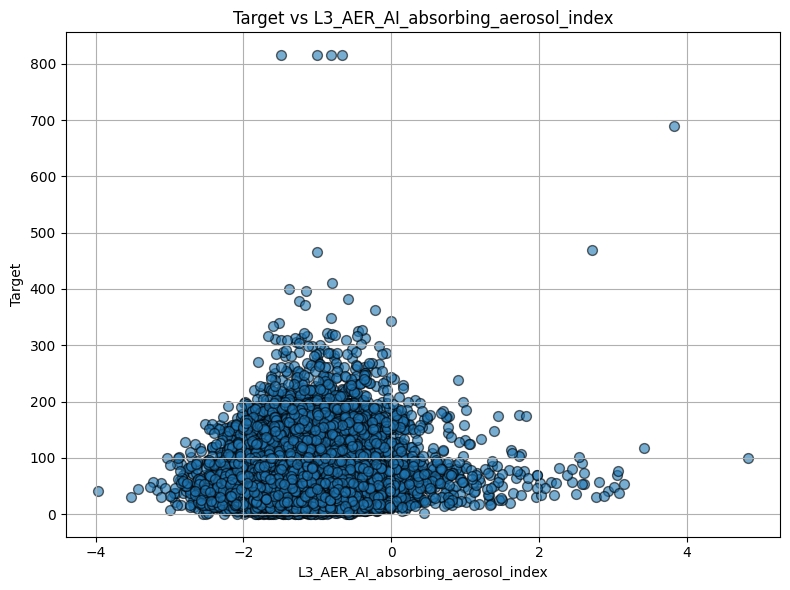

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["L3_AER_AI_absorbing_aerosol_index"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("L3_AER_AI_absorbing_aerosol_index")
plt.ylabel("Target")
plt.title("Target vs L3_AER_AI_absorbing_aerosol_index")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

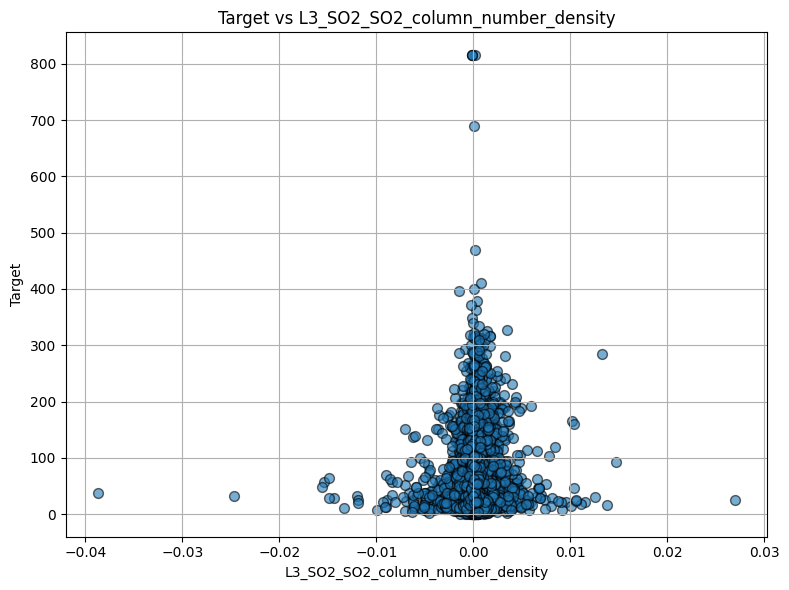

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["L3_SO2_SO2_column_number_density"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("L3_SO2_SO2_column_number_density")
plt.ylabel("Target")
plt.title("Target vs L3_SO2_SO2_column_number_density")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

In [ ]:
#-> remove outliers below 

In [ ]:
plt.figure(figsize=(8,6))  

plt.scatter(
    df_filtered["L3_NO2_NO2_column_number_density"],
    df_filtered["target"],
    alpha=0.6,  # make points slightly transparent for dense data
    edgecolor='k', # black edge around points
    s=50          # size of points
)

plt.xlabel("L3_NO2_NO2_column_number_density")
plt.ylabel("Target")
plt.title("Target vs L3_NO2_NO2_column_number_density")
plt.grid(True)  # add grid for readability
plt.tight_layout()  # better layout
plt.show()

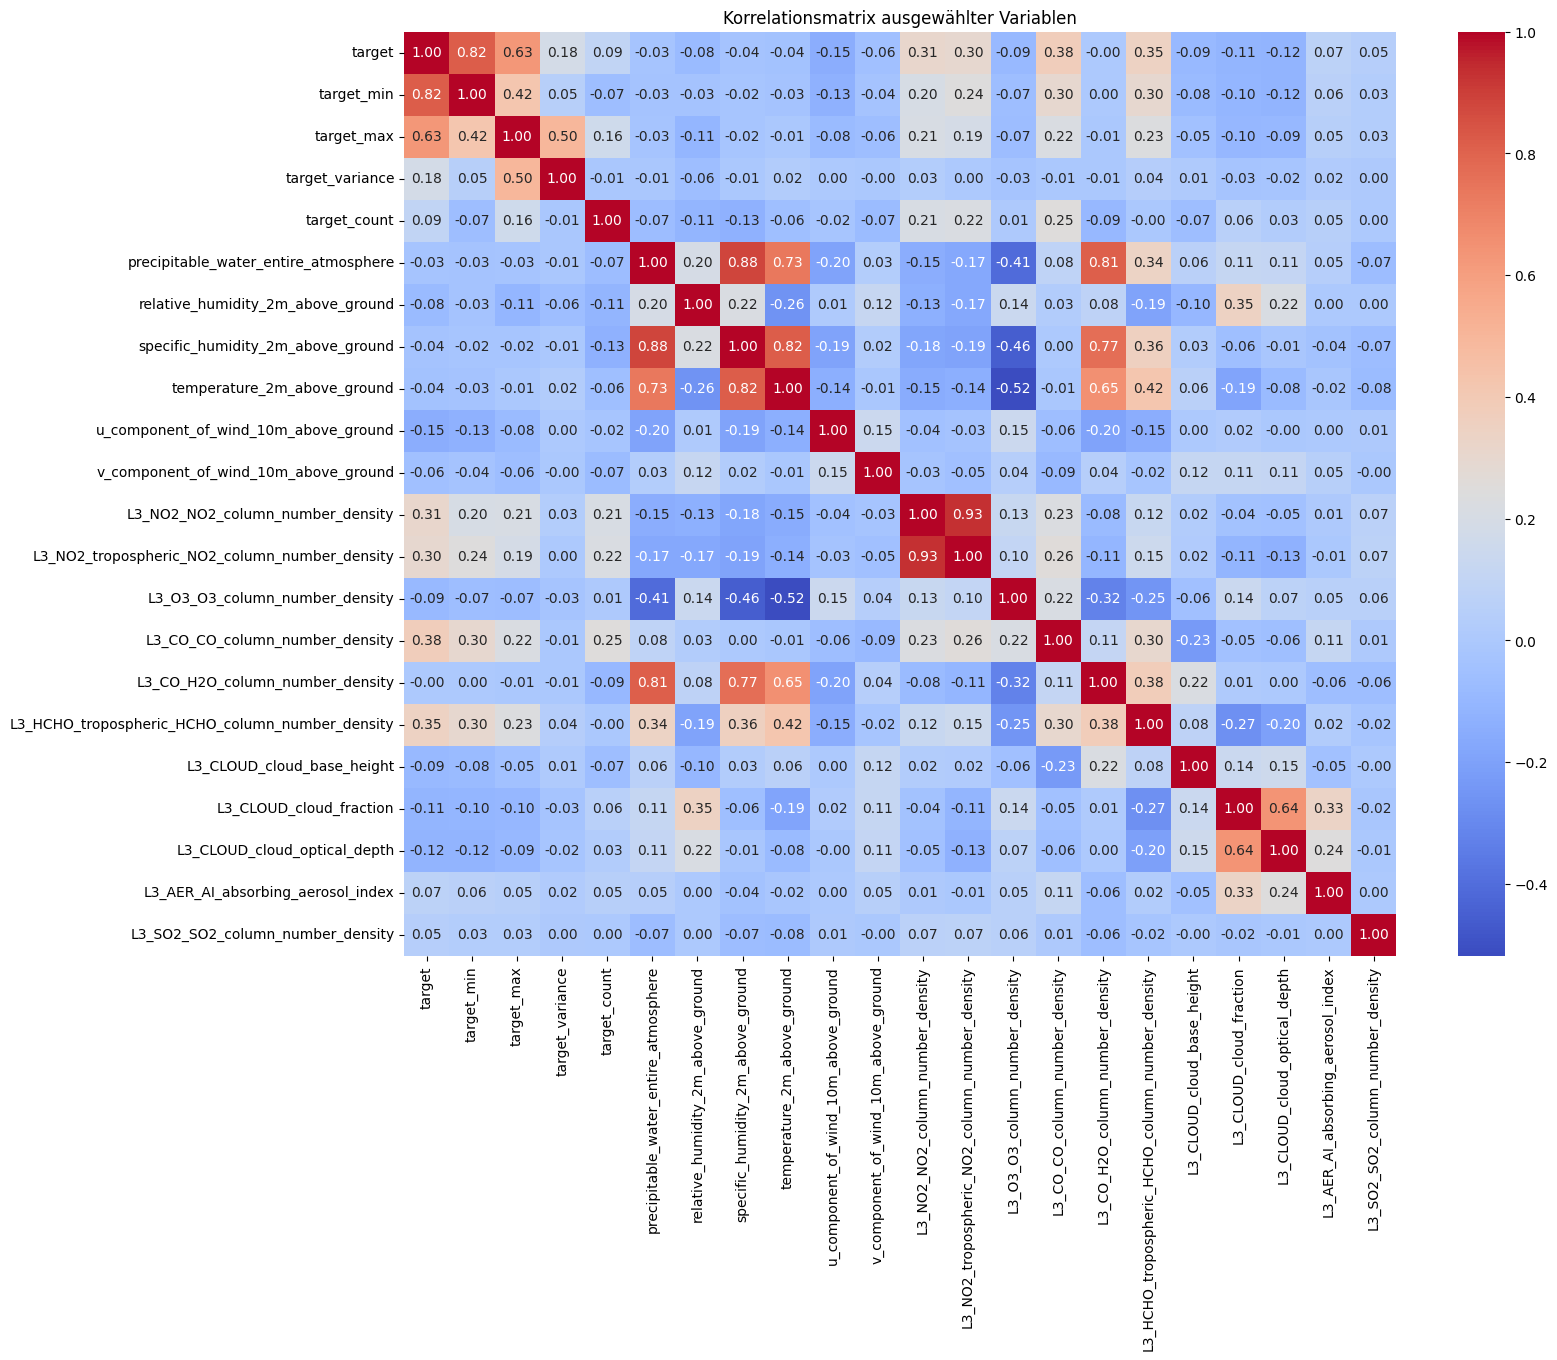

In [ ]:
# Plot correlation matrix   
corr = df_filtered.corr(numeric_only=True)
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix ausgewählter Variablen")
plt.show()

# Data Cleaning

In [5]:
from clean_fct import filter_cols


In [6]:
df_filtered = filter_cols(df)

In [7]:
#Duplicates check

df_filtered.duplicated().value_counts()

False    30557
Name: count, dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")


### Detect Skewness and distribution
.describe()
(Boxplot)

In [ ]:
df_filtered.describe()

Date        target    target_min   
count                          30557  30557.000000  30557.000000  \
mean   2020-02-17 11:32:35.807180032     61.148045     29.025866   
min              2020-01-02 00:00:00      1.000000      1.000000   
25%              2020-01-25 00:00:00     25.000000      5.000000   
50%              2020-02-17 00:00:00     50.000000     15.000000   
75%              2020-03-12 00:00:00     80.000000     44.000000   
max              2020-04-04 00:00:00    815.000000    438.000000   
std                              NaN     46.861309     33.119775   

         target_max  target_variance  target_count   
count  30557.000000     3.055700e+04  30557.000000  \
mean     117.992234     7.983756e+03    125.831135   
min        1.000000     0.000000e+00      2.000000   
25%       60.000000     1.064920e+03     44.000000   
50%       91.000000     2.395350e+03     72.000000   
75%      155.000000     5.882550e+03    150.000000   
max      999.000000     1.841490e+06   1552.000000   
std      100.417713     4.863090e+04    146.581856   

       precipitable_water_entire_atmosphere   
count                          30557.000000  \
mean                              15.302326   
min                                0.420044   
25%                                7.666667   
50%                               12.200000   
75%                               19.900000   
max                               72.599998   
std                               10.688573   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
count                       30557.000000                       30557.000000  \
mean                           70.552747                           0.006004   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   
std                            18.807884                           0.003787   

       temperature_2m_above_ground  ...   
count                 30557.000000  ...  \
mean                      9.321342  ...   
min                     -34.647879  ...   
25%                       3.123071  ...   
50%                       8.478424  ...   
75%                      16.201563  ...   
max                      37.437921  ...   
std                       9.343226  ...   

       L3_NO2_tropospheric_NO2_column_number_density   
count                                   21888.000000  \
mean                                        0.000056   
min                                        -0.000049   
25%                                         0.000016   
50%                                         0.000035   
75%                                         0.000070   
max                                         0.002055   
std                                         0.000075   

       L3_O3_O3_column_number_density  L3_CO_CO_column_number_density   
count                    30274.000000                    25134.000000  \
mean                         0.139533                        0.036230   
min                          0.000000                        0.000000   
25%                          0.121587                        0.031181   
50%                          0.140809                        0.035563   
75%                          0.157940                        0.039797   
max                          0.237652                        0.291536   
std                          0.030511                        0.010909   

       L3_CO_H2O_column_number_density   
count                     25134.000000  \
mean                        983.448217   
min                           0.000000   
25%                         414.197452   
50%                         713.649

In [10]:
skew_values = df_filtered.skew(numeric_only=True).sort_values(ascending=False)

# Display skewed features
print("Skewness of numerical features:")
print(skew_values)

Skewness of numerical features:
target_variance                                    23.455691
L3_NO2_NO2_column_number_density                    7.402073
L3_NO2_tropospheric_NO2_column_number_density       6.185637
target_max                                          3.915403
target_count                                        3.706539
L3_CLOUD_cloud_optical_depth                        3.346628
L3_CO_H2O_column_number_density                     3.266800
target                                              2.043157
target_min                                          1.931902
precipitable_water_entire_atmosphere                1.428406
L3_CLOUD_cloud_base_height                          1.318588
L3_CO_CO_column_number_density                      1.274629
specific_humidity_2m_above_ground                   1.245273
L3_HCHO_tropospheric_HCHO_column_number_density     0.905838
L3_AER_AI_absorbing_aerosol_index                   0.703341
u_component_of_wind_10m_above_ground                0

In [11]:
# List of columns to exclude from skewness handling
target_related_cols = ['target', 'target_variance', 'target_min', 'target_max', 'target_count']

# Highlight highly skewed features excluding target-related columns
skewed_cols_excluding_target = skew_values[abs(skew_values) > 2].drop(labels=target_related_cols, errors='ignore')

print("Highly skewed columns (excluding target-related):")
print(skewed_cols_excluding_target)


Highly skewed columns (excluding target-related):
L3_NO2_NO2_column_number_density                 7.402073
L3_NO2_tropospheric_NO2_column_number_density    6.185637
L3_CLOUD_cloud_optical_depth                     3.346628
L3_CO_H2O_column_number_density                  3.266800
L3_SO2_SO2_column_number_density                -3.644402
dtype: float64


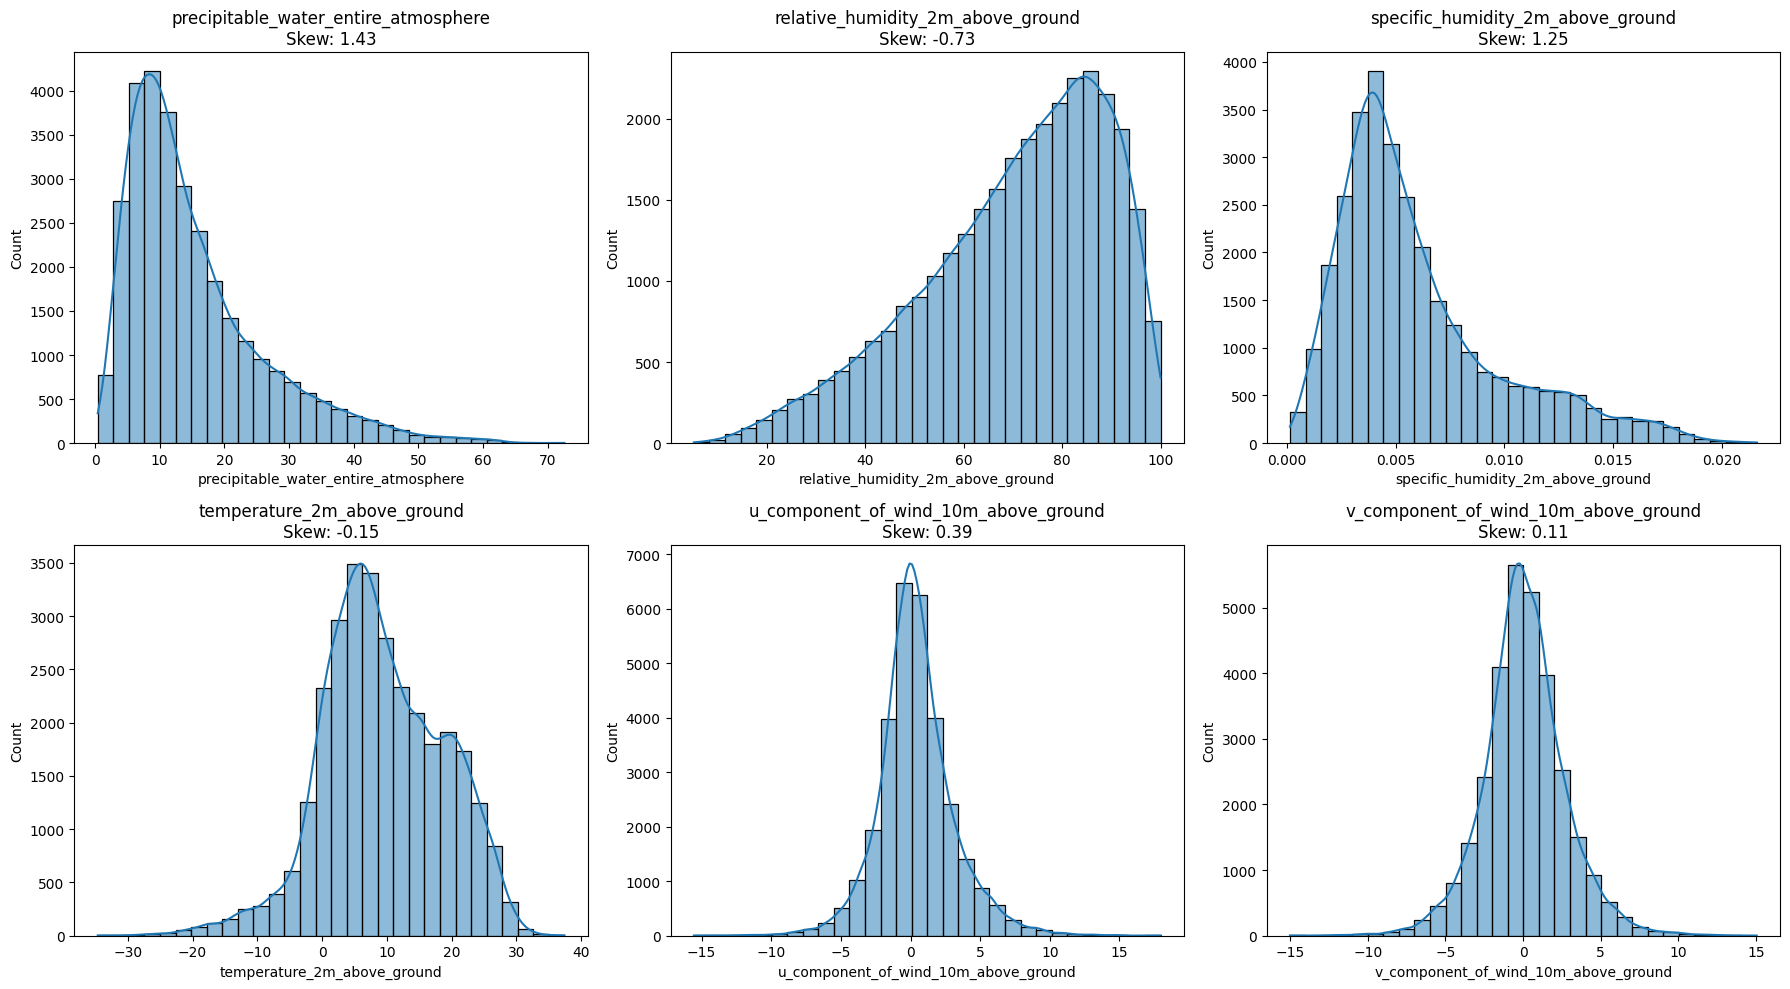

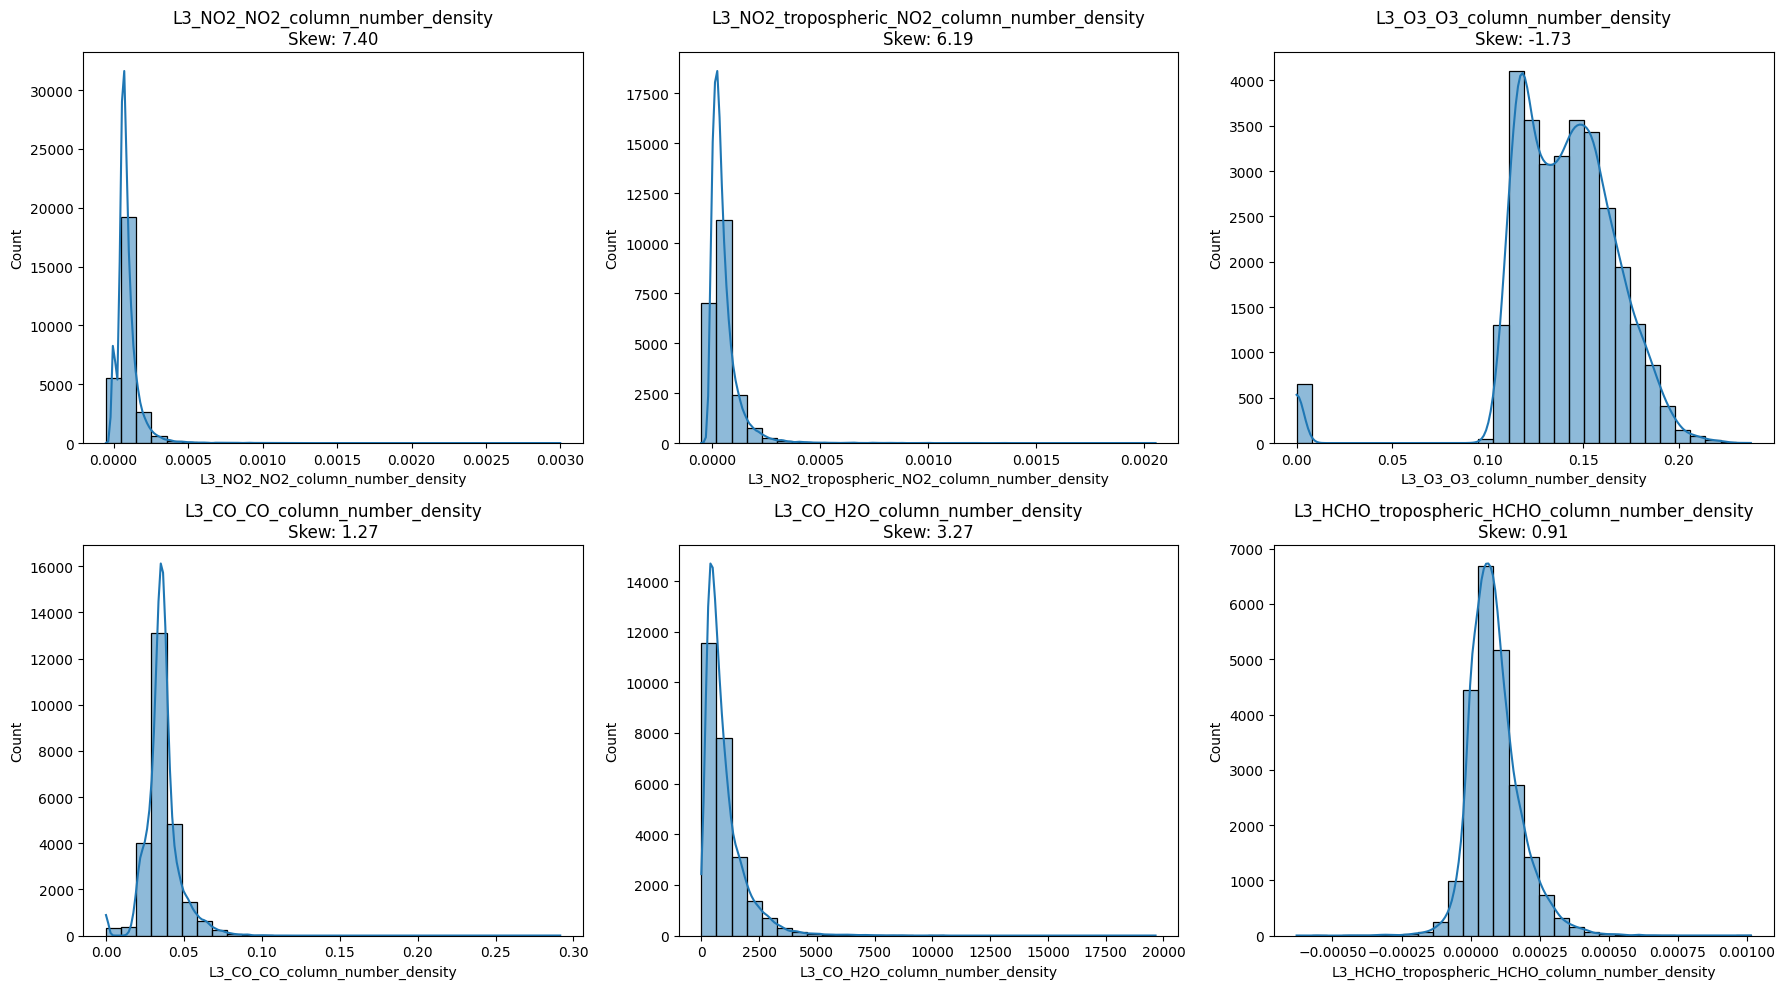

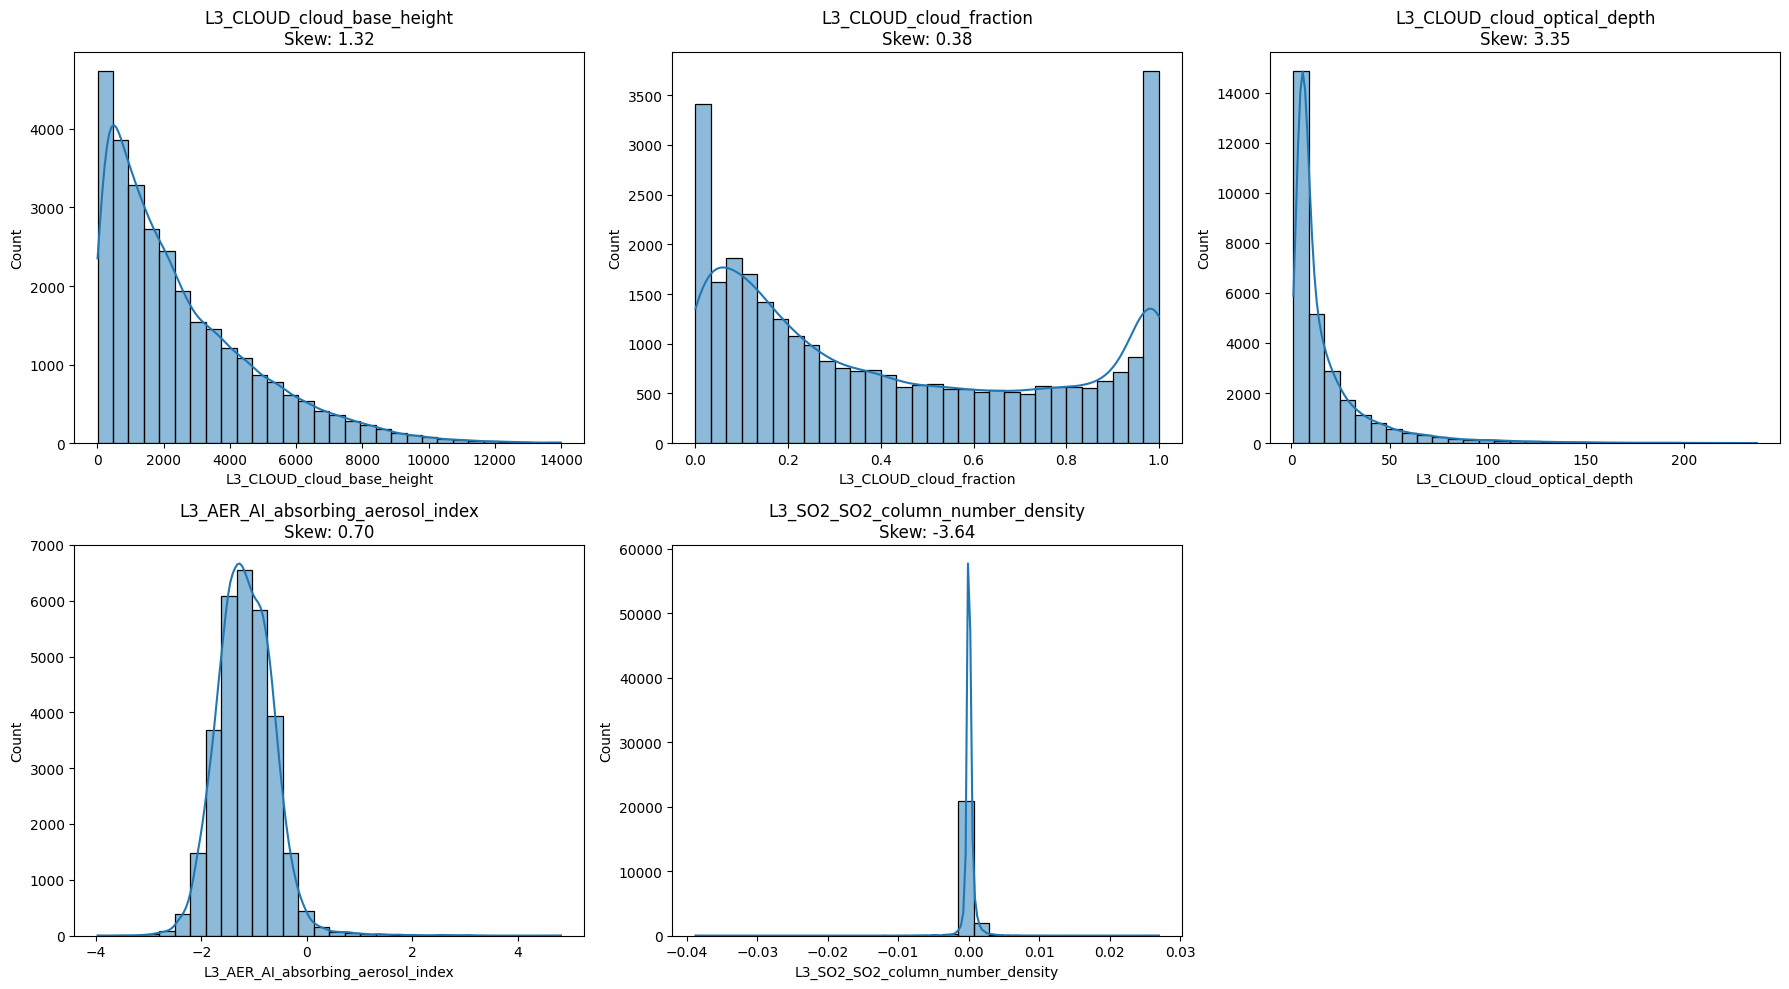

In [ ]:
# List of columns to exclude
target_related_cols = ['target', 'target_variance', 'target_min', 'target_max', 'target_count']

# Numeric columns excluding target-related
numeric_cols = [col for col in df_filtered.select_dtypes(include=np.number).columns if col not in target_related_cols]

# Plot 6 histograms per figure
cols_per_fig = 6
n_figs = math.ceil(len(numeric_cols) / cols_per_fig)

for i in range(n_figs):
    subset = numeric_cols[i*cols_per_fig:(i+1)*cols_per_fig]
    plt.figure(figsize=(18, 10))
    for j, col in enumerate(subset, 1):
        plt.subplot(2, 3, j)
        sns.histplot(df_filtered[col].dropna(), kde=True, bins=30)
        plt.title(f"{col}\nSkew: {df_filtered[col].skew():.2f}")
    plt.tight_layout()
    plt.show()



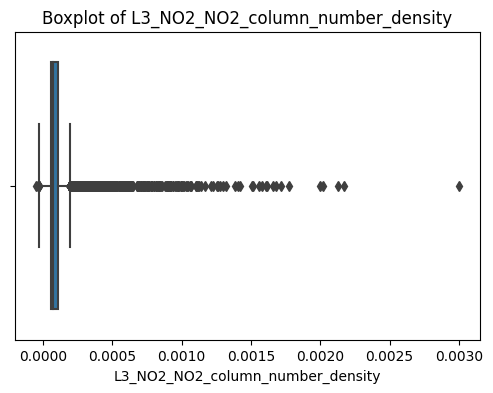

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original skewed features
skewed_features = [
    'target_variance', 
    'L3_NO2_NO2_column_number_density', 
    'L3_NO2_tropospheric_NO2_column_number_density', 
    'target_max', 
    'target_count', 
    'L3_CLOUD_cloud_optical_depth', 
    'L3_CO_H2O_column_number_density'
]

# List of target-related columns to exclude
target_related_cols = ['target', 'target_variance', 'target_min', 'target_max', 'target_count']

# Keep only features, remove target-derived
skewed_features_filtered = [col for col in skewed_features if col not in target_related_cols]

# Plot boxplots
for col in skewed_features_filtered:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Check and remove Outliers

Assessing outliers/ extreme values so we are able to see which and how to handle them.

In [12]:
# List of target-related columns to exclude
target_related_cols = ['target', 'target_variance', 'target_min', 'target_max', 'target_count']

# Only keep skewed predictor features
skewed_features_filtered = [col for col in skewed_features if col not in target_related_cols]

# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Check outliers for predictor features
for col in skewed_features_filtered:
    outliers = detect_outliers(df_filtered, col)
    print(f"{col} → {len(outliers)} outliers")



NameError: name 'skewed_features' is not defined

## Preprocessing

Creating a pipeline to process numeric columns (excluding target variables) that respects physical constraints and handles outliers and skewness. M=

In [13]:
from clean_fct import filter_cols
from sklearn.preprocessing import PowerTransformer, StandardScaler


def preprocess_for_air_quality(
    df: pd.DataFrame,
    date_col: str = "Date",
    place_col: str = "Place_ID",
    target_col: str = "target",
    impute_method: str = "weekly",
    scale: bool = True
) -> pd.DataFrame:
    """
    Preprocess predictor columns for the Air Pollution Challenge.
    
    Steps:
    1) Time-aware imputation of missing numeric predictor values
    2) Remove impossible vertical column values (< -0.001 mol/m²)
    3) Cap extremely high cloud values (99th percentile)
    4) Winsorize extreme values (1st-99th percentile)
    5) Transform highly skewed features
    6) Optional scaling
    Target and target-derived columns are untouched.
    """

    from copy import deepcopy
    df_proc = deepcopy(df)

    # Identify numeric columns excluding target and target-related
    target_related_cols = [target_col, 'target_min', 'target_max', 'target_variance', 'target_count']
    numeric_cols = [c for c in df_proc.select_dtypes(include=np.number).columns if c not in target_related_cols]

    # 1) Impute missing values using the time-aware function
    df_proc = impute_numeric_by_time(df_proc, date_col=date_col, place_col=place_col, method=impute_method)

    # 2) Remove impossible negative vertical column densities
    for col in numeric_cols:
        if "column" in col or col.endswith("_density"):
            df_proc = df_proc[df_proc[col] >= -0.001]

    # 3) Cap extremely high cloud values at 99th percentile
    cloud_cols = [c for c in numeric_cols if "cloud" in c.lower()]
    for col in cloud_cols:
        upper_limit = df_proc[col].quantile(0.99)
        df_proc[col] = df_proc[col].clip(lower=None, upper=upper_limit)

    # 4) Winsorize all numeric columns (1st-99th percentile)
    def cap_outliers(series, lower_quantile=0.01, upper_quantile=0.99):
        lower = series.quantile(lower_quantile)
        upper = series.quantile(upper_quantile)
        return series.clip(lower, upper)

    for col in numeric_cols:
        df_proc[col] = cap_outliers(df_proc[col])

    # 5) Transform highly skewed features (>2)
    skewed_features = df_proc[numeric_cols].skew().sort_values(ascending=False)
    high_skew = skewed_features[abs(skewed_features) > 2].index.tolist()
    if high_skew:
        pt = PowerTransformer(method='yeo-johnson')
        df_proc[high_skew] = pt.fit_transform(df_proc[high_skew])

    # 6) Optional scaling
    if scale:
        scaler = StandardScaler()
        df_proc[numeric_cols] = scaler.fit_transform(df_proc[numeric_cols])

    return df_proc


In [14]:
from impute_by_date import impute_numeric_by_time
# Step 0: Filter only the columns you want
df_filtered = filter_cols(df)  # your filtered training data

# Step 1: Preprocess predictor columns
df_processed = preprocess_for_air_quality(df_filtered, impute_method="weekly")

# Inspect processed data
print(df_processed.info())

df_processed.to_csv("data/df_processed.csv")


<class 'pandas.core.frame.DataFrame'>
Index: 28753 entries, 0 to 30556
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Place_ID X Date                                  28753 non-null  object        
 1   Date                                             28753 non-null  datetime64[ns]
 2   Place_ID                                         28753 non-null  object        
 3   target                                           28753 non-null  float64       
 4   target_min                                       28753 non-null  float64       
 5   target_max                                       28753 non-null  float64       
 6   target_variance                                  28753 non-null  float64       
 7   target_count                                     28753 non-null  int64         
 8   precipitable_water_entire_atmosphere     